In [ ]:
!pip install ultralytics --quiet
!pip install ipywidgets --quiet

!wget https://github.com/GingerBrains/object-detection/raw/main/best.pt -O best.pt

from ultralytics import YOLO

# Load the pretrained model
model = YOLO('best.pt')








   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.8 MB/s eta 0:00:00
--2025-05-19 07:09:19--  https://github.com/Ginge

✅ Image uploaded. Detecting weapons...

0: 544x800 2 Guns, 806.1ms
Speed: 6.3ms preprocess, 806.1ms inference, 6.5ms postprocess per image at shape (1, 3, 544, 800)


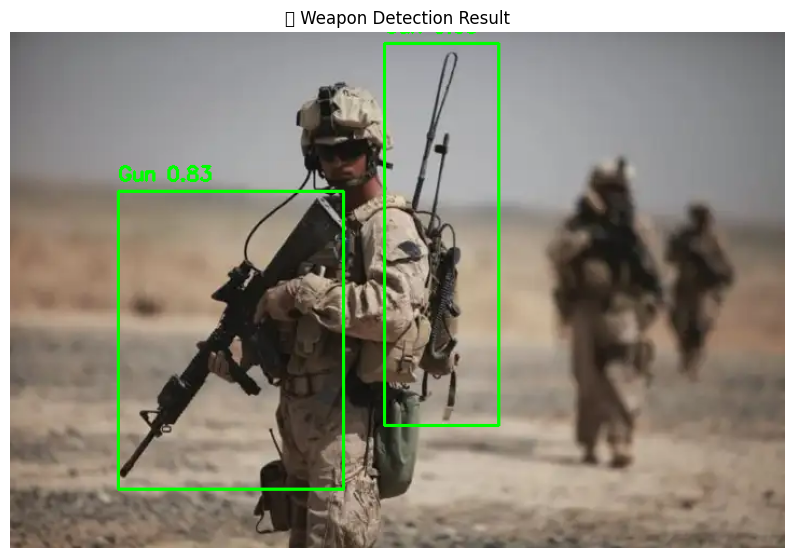

In [ ]:
from ultralytics import YOLO

# Load the pretrained model
model = YOLO('best.pt')

import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import io
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create an upload button
upload_btn = widgets.FileUpload(accept='image/*', multiple=False)

def handle_upload(change):
    clear_output(wait=True)
    print("✅ Image uploaded. Detecting weapons...")

    # Get the uploaded image
    uploaded_file = next(iter(upload_btn.value.values()))
    image_bytes = uploaded_file['content']
    image = Image.open(io.BytesIO(image_bytes)).convert("RGB")
    image_np = np.array(image)
    image_bgr = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

    # Perform detection
    results = model(image_bgr)[0]

    # Draw bounding boxes
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls = int(box.cls[0])
        conf = float(box.conf[0])
        label = f"{model.names[cls]} {conf:.2f}"
        cv2.rectangle(image_bgr, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image_bgr, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Convert back to RGB and display
    result_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 8))
    plt.imshow(result_rgb)
    plt.axis("off")
    plt.title("🔫 Weapon Detection Result")
    plt.show()

# Bind the upload button to the handler
upload_btn.observe(handle_upload, names='value')

# Display the upload button
print("📤 Upload an image to detect weapons:")
display(upload_btn)